# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv('data/comprar_alquilar.csv')
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [5]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [6]:
df['comprar'].value_counts()

0    135
1     67
Name: comprar, dtype: int64

In [7]:
df['estado_civil'].value_counts()

2    73
0    68
1    61
Name: estado_civil, dtype: int64

In [8]:
df['trabajo'].value_counts()

5    31
8    29
7    27
6    23
3    21
4    19
2    18
1    18
0    16
Name: trabajo, dtype: int64

In [9]:
df.groupby('trabajo')['ingresos'].mean()

trabajo
0    5393.750000
1    4665.666667
2    4533.166667
3    5341.761905
4    5109.368421
5    5139.032258
6    4940.391304
7    4704.148148
8    4849.379310
Name: ingresos, dtype: float64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

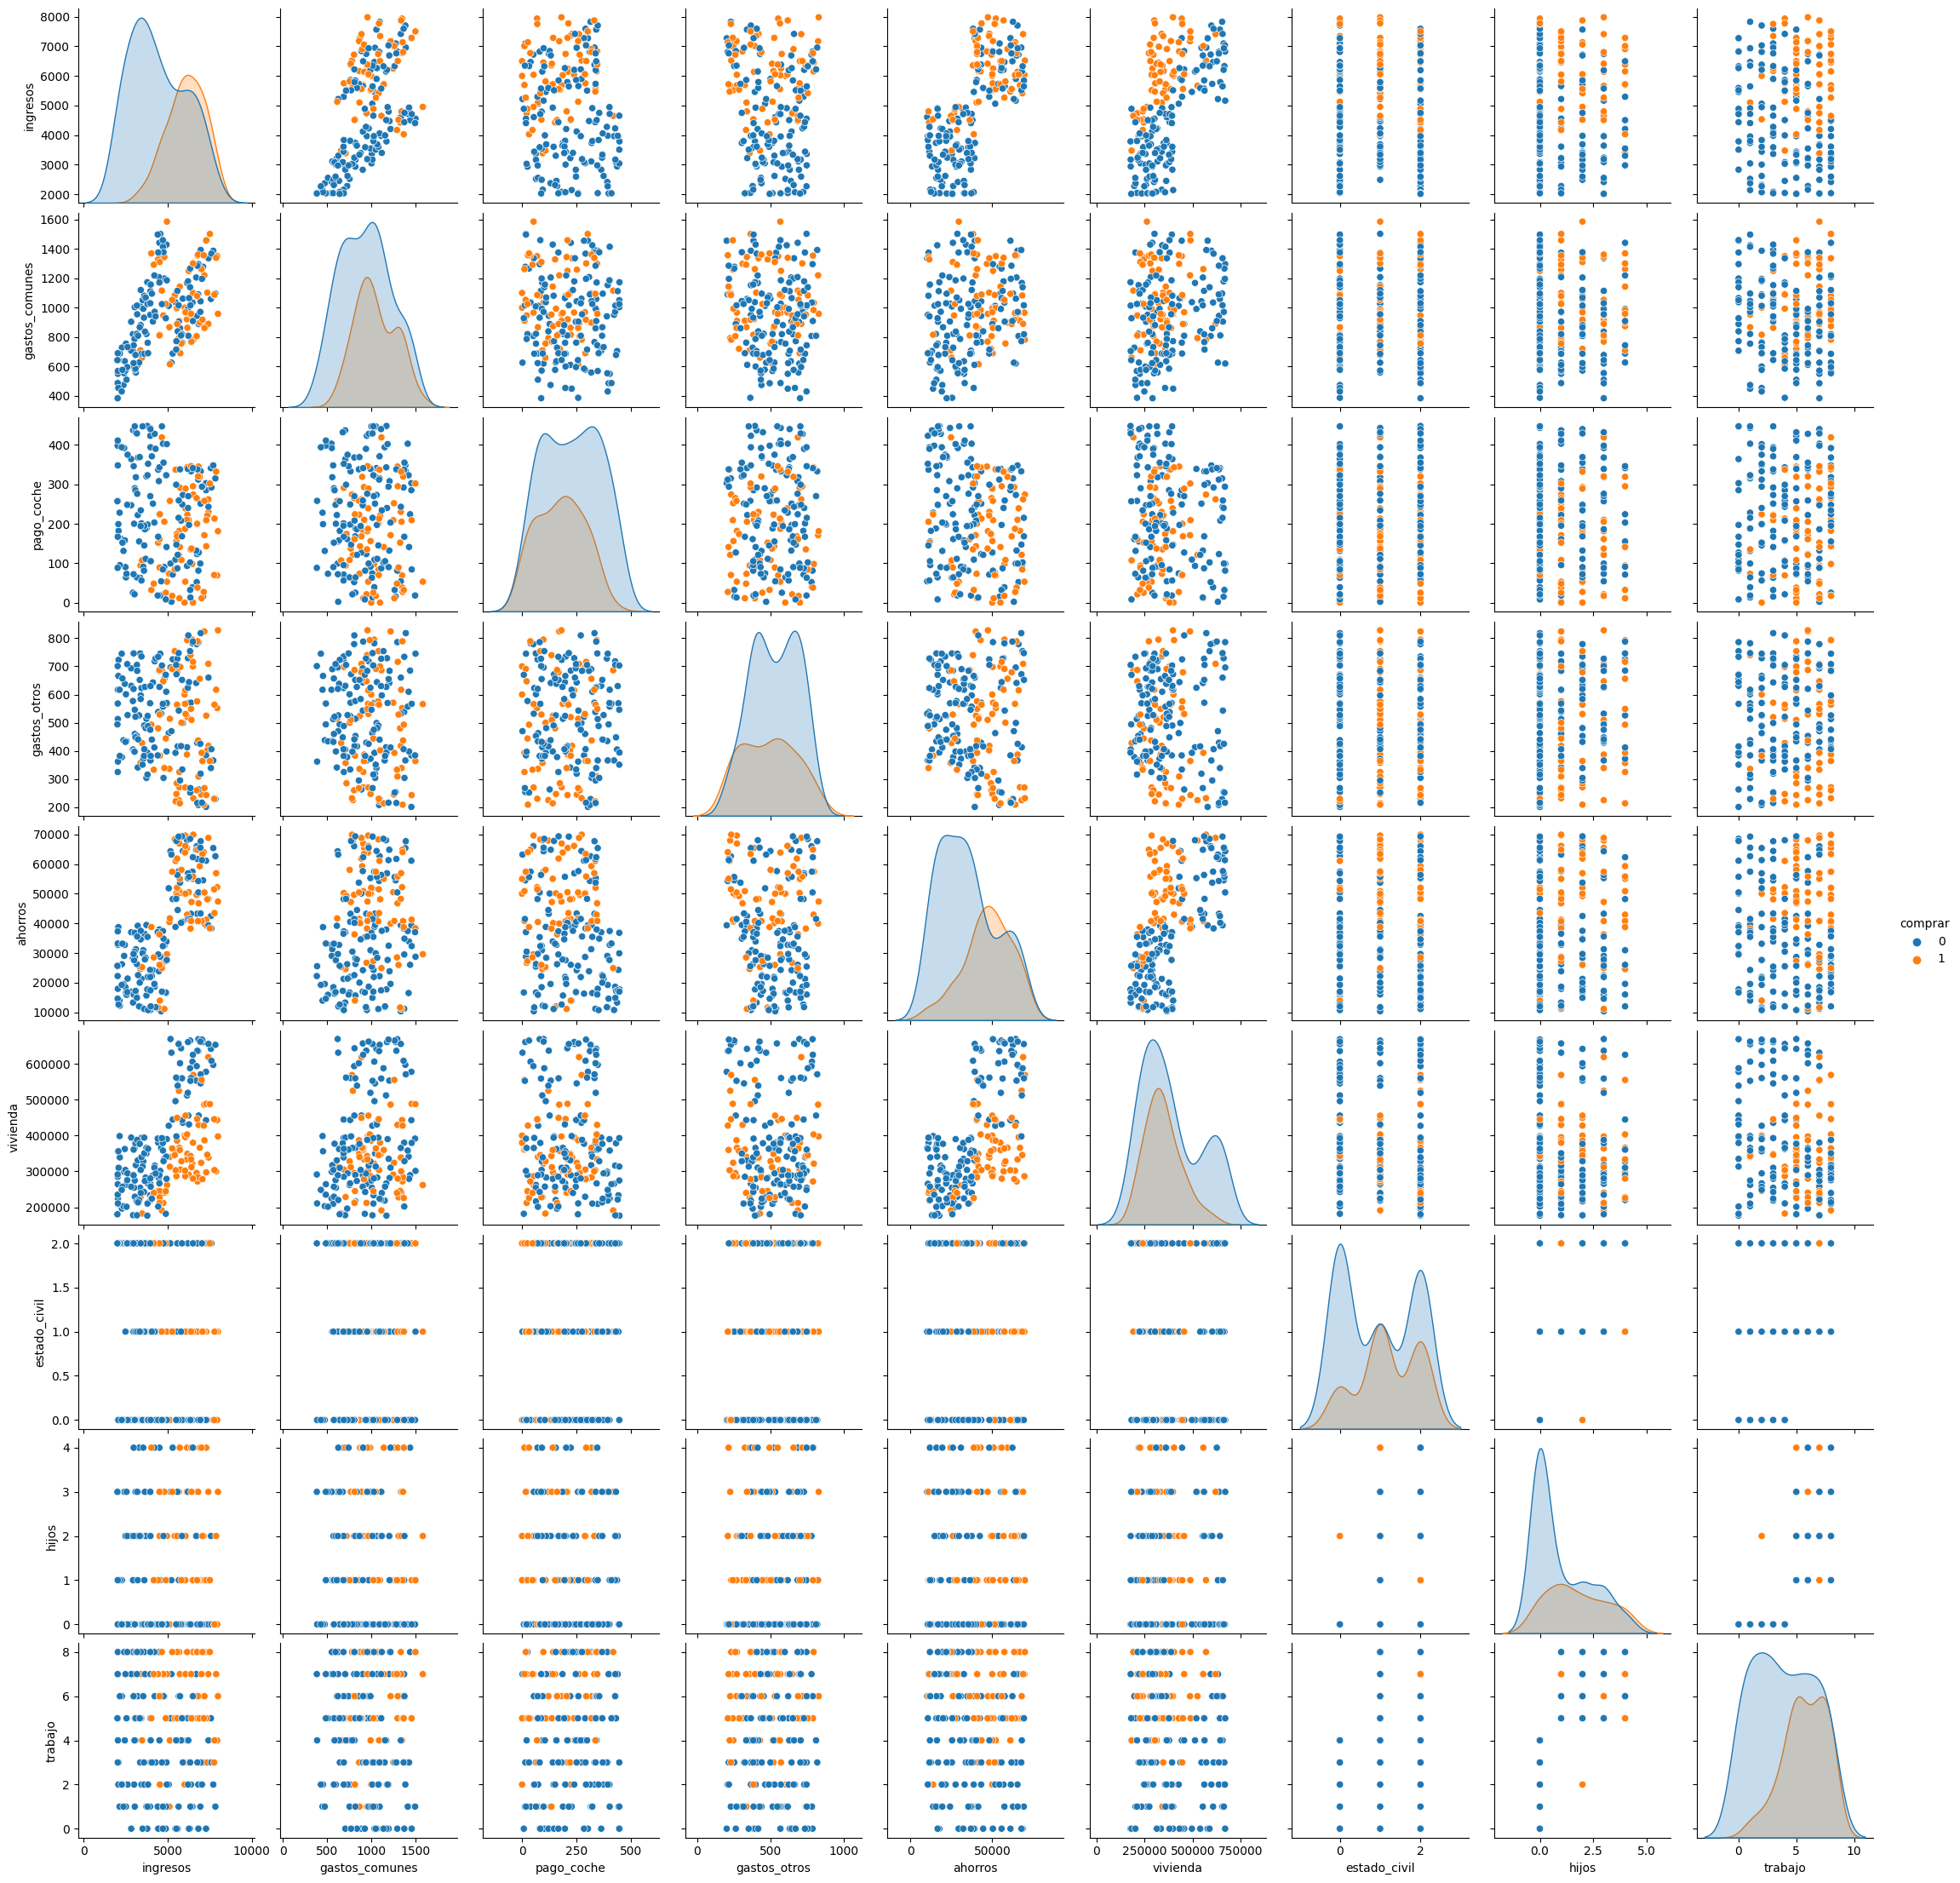

In [10]:
sns.pairplot(df, hue="comprar")

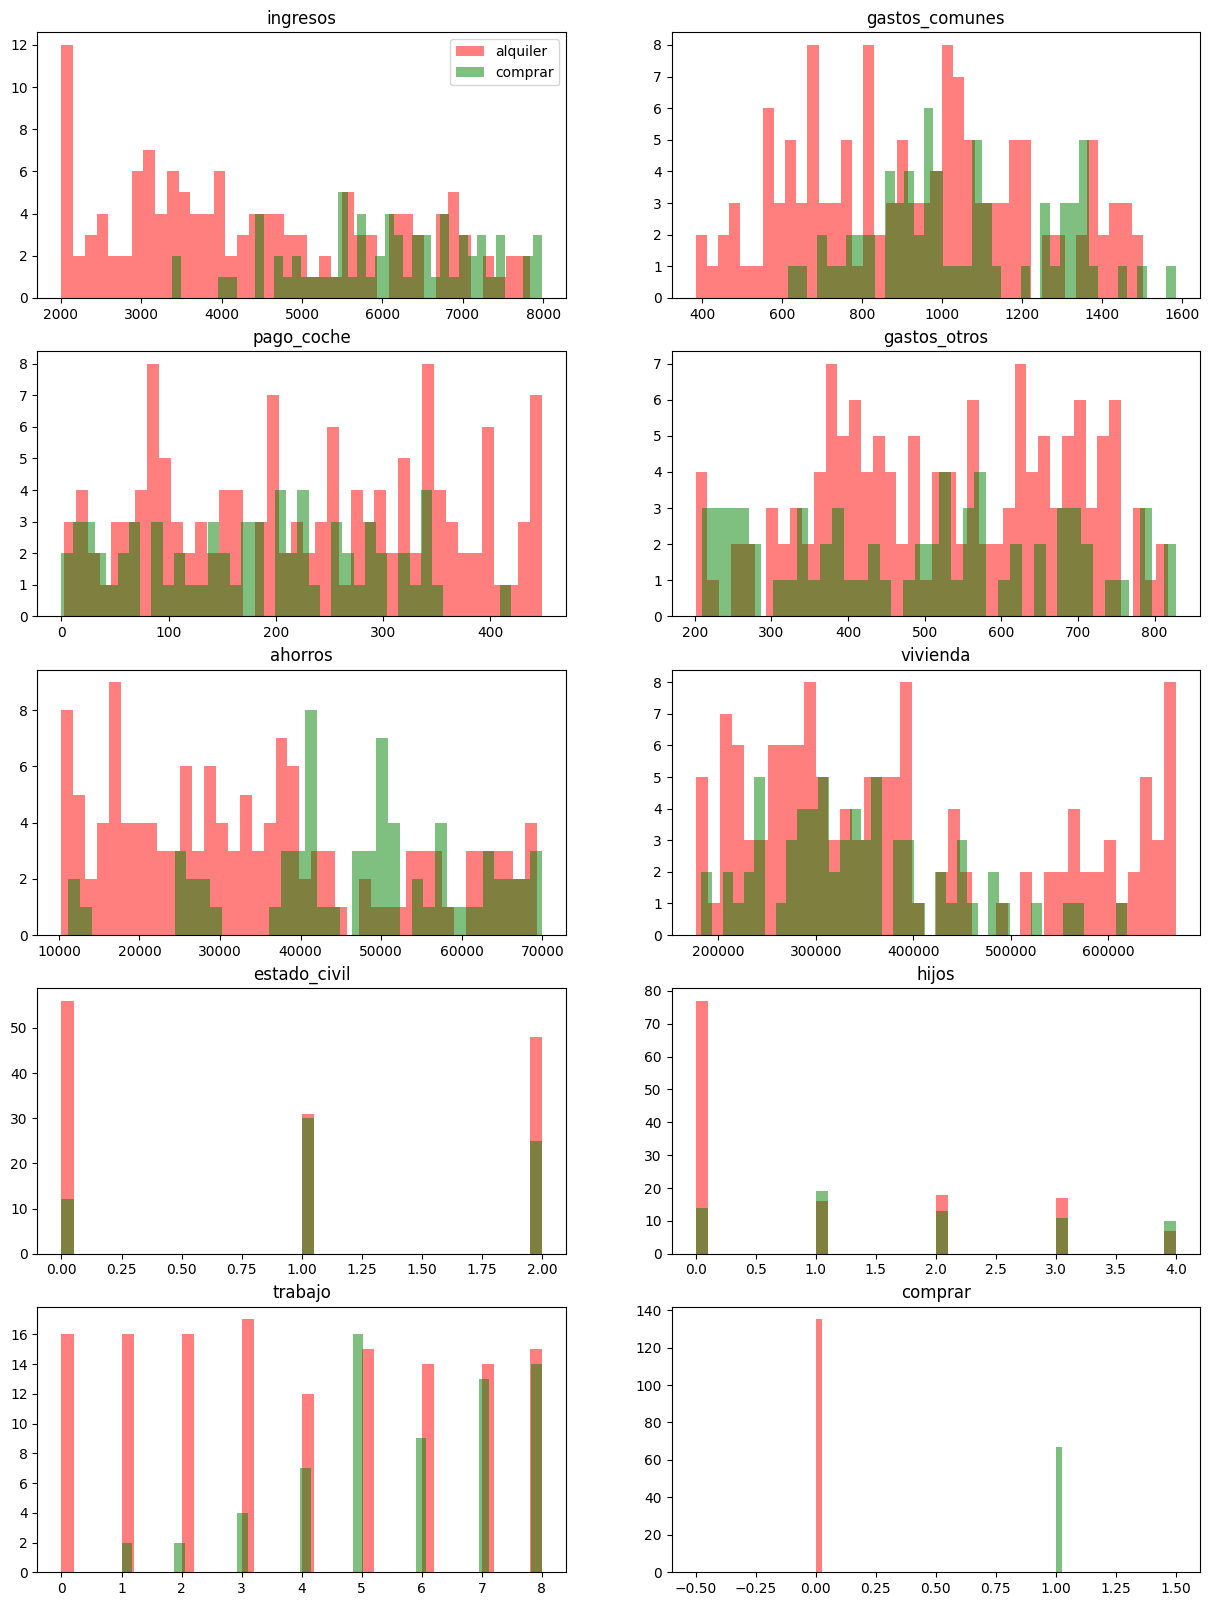

In [11]:
fig, axis = plt.subplots(5,2, figsize=(15,20))

alquiler = df[df['comprar']==0] 
comprar = df[df['comprar']==1] 

axes = axis.ravel()
for i in range(len(df.columns)):
    axes[i].hist(alquiler.values[:,i], bins=40, color = 'r', alpha=0.5)
    axes[i].hist(comprar.values[:,i], bins=40, color = 'g', alpha=0.5)
    axes[i].set_title(df.columns[i])

axes[0].legend(["alquiler", "comprar"])

<Axes: >

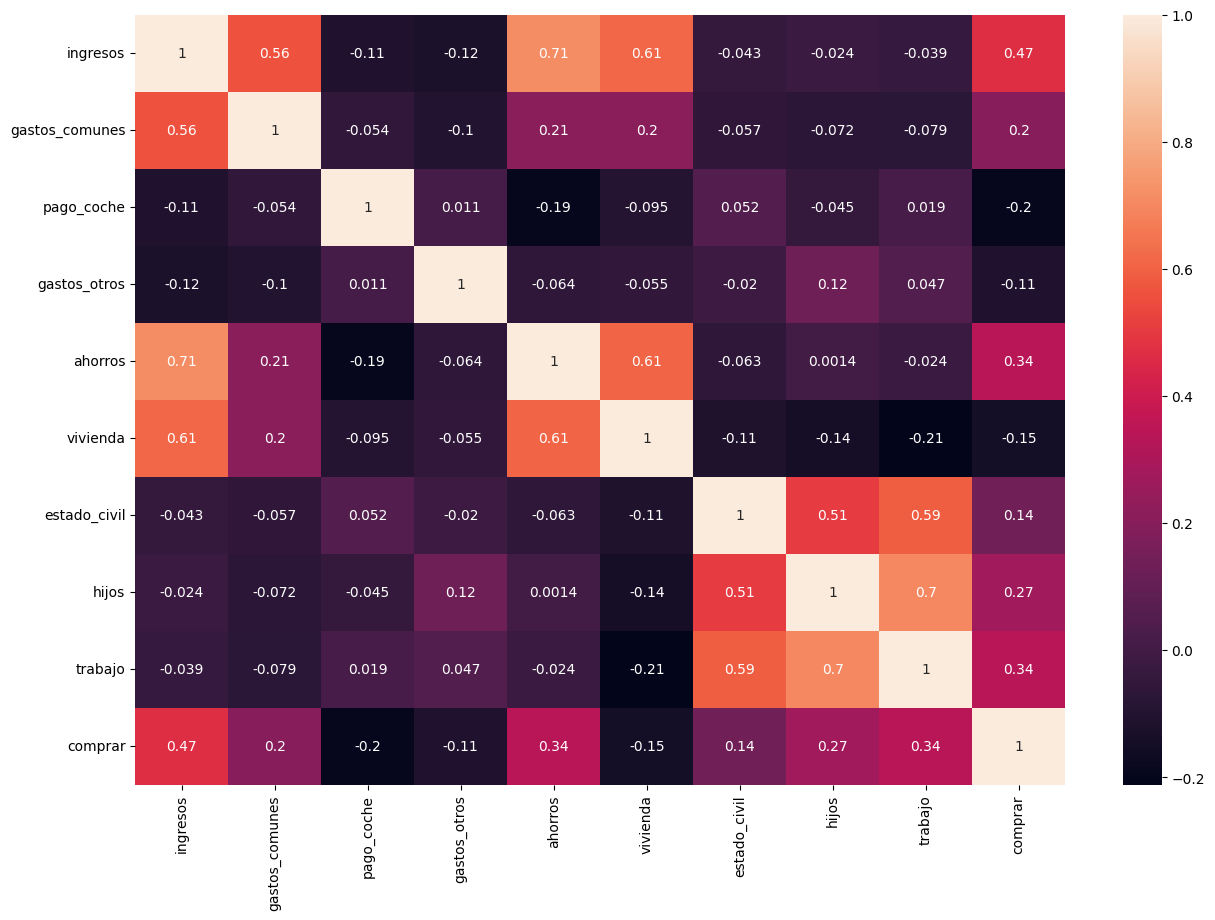

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [14]:
X = df.drop(columns="comprar")
y = df['comprar']

print(X.shape)
print(y.shape)

(202, 9)
(202,)


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [16]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [17]:
pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

Text(0, 0.5, 'Ratio de varianza acumulada')

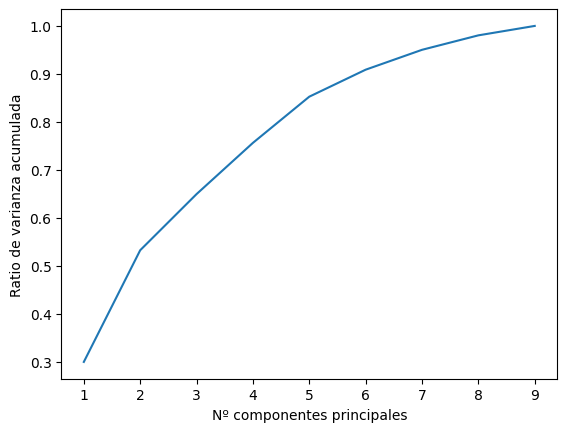

In [20]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,10)))
plt.xlabel("Nº componentes principales")
plt.ylabel("Ratio de varianza acumulada")

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

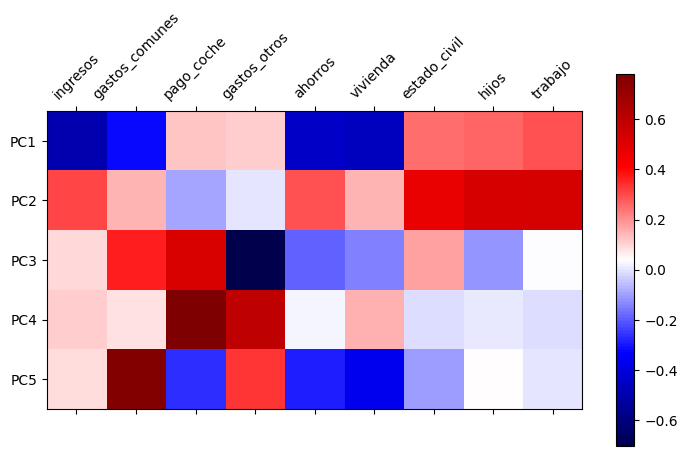

In [27]:
plt.matshow(pca.components_[:5], cmap="seismic")
plt.yticks([0,1,2,3,4], ['PC1', "PC2",'PC3', "PC4", "PC5"]);
plt.xticks(range(len(X.columns)), X.columns, rotation=45);
plt.colorbar()

In [28]:
pd.DataFrame(pca.components_[:5], columns=X.columns, index=['PC1', "PC2",'PC3', "PC4", "PC5"])

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 9)
(41, 9)
(161,)
(41,)


In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', LogisticRegression())])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', LogisticRegression())])

In [34]:
y_pred = pipe.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.7560975609756098
confusion_matrix
 [[21  3]
 [ 7 10]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
pipe_gs = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression())
])
pipe_gs

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', LogisticRegression())])

In [40]:
params_log = {
    "pca__n_components": [4,5,6],
    "classifier__C": [0.1,1,10]
}

params_rf = {
    "scaler" : [StandardScaler(), None],
    "pca__n_components": [4,5,6],
    "classifier": [RandomForestClassifier()],
    "classifier__max_depth": [2,3,4,5]
}

params = [params_log, params_rf]

In [41]:
gs = GridSearchCV(pipe_gs, params, cv=10, scoring="recall")
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier__C': [0.1, 1, 10],
                          'pca__n_components': [4, 5, 6]},
                         {'classifier': [RandomForestClassifier(max_depth=5)],
                          'classifier__max_depth': [2, 3, 4, 5],
                          'pca__n_components': [4, 5, 6],
                          'scaler': [StandardScaler(), None]}],
             scoring='recall')

In [42]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'classifier': RandomForestClassifier(max_depth=5), 'classifier__max_depth': 5, 'pca__n_components': 5, 'scaler': None}
0.78
Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(max_depth=5))])


In [43]:
final_model = gs.best_estimator_.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.8292682926829268
confusion_matrix
 [[23  1]
 [ 6 11]]


In [44]:
import pickle

In [45]:
final_model = gs.best_estimator_.fit(X, y) # kaggle

In [46]:
with open("my_model.pkl", "wb") as archivo_salida:
    pickle.dump(final_model, archivo_salida)

In [47]:
with open("my_model.pkl", "rb") as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [48]:
modelo_importado

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(max_depth=5))])